# Part II Computing Project: Surveying using stars 

To do: 
- fully understand the SVD theory and have some form of write up on that
- understand why the sampling changes things? something to do with neighbourhood sparsity 


Plan: 

### Physical theory
- Why we have these large telescope arrays
    - Gives the precision of telescope that large, without the same amount of light
    - How does interferometry work, taking paths lengths to be equal when the visibility is maximised (check this!) 
    - we have the three things that change, the carts, the POP mirrors (which are not given) and the "constant term" which is the same on any given night
- What are our ground truths 
    - That the measures occur at exactly maximum visibility and therefore zero path difference
    - That there is no error in the elevation and the azimuth measured 
- Why the star position matters
    - give the 2d example and then raise to 3d to show that with the star vector it is possible to get an equations in terms of the star vector and the baselines etc. 
    - why we need many data points, how this could effect the error
    
- What data is there
    - The data is from 4 days in 2019 and many days in 2012
    - The task is to find the model parameters (this is the telescope locations and the POPs) 
    - We do this via least-squares linear regression
    
### Mathematical theory 
- Explain that we have many linear equations... sounds like a matrix, explain how we can formulate the equation to get design matrix equation 
- Then show that if we could find an matrix that minimises the 2-norm that we have the least-squares regression
- Why is the least-squares regression favourable, what are alternatives 

- eigendecomposition, and how SVD is the generalisation of this
- How the pseudo-inverse can be arrived at from the SVD 
- 

### Code techniques
- Standard packages used
    - matplotlib for visualisations
    - numpy, how it has c-like speeds and why is python so popular for data science despite the slow speeds 
        - created in 2006
        - python not originally intended for numerical efficiency 
        - explain the difference between the two languages
        - Show some tests for efficiency (can write a function that shows the difference
        - How we can time our code with `%timeit` 
    - In the years since python has added in many symbols which help make linear algebra easier e.g. `@` symbol for mat mult
    - Python is easier to learn 
    - Cloud computing allows for 
    - JIT compilation
    - Jupyter notebooks (how has the flow here matched what a data scientist would do in the field)
    - Pandas
        - history
        - built around pandas.DataFrame object which can be populated by CSVs, JSON, excels files etc.
        - works well with notebooks
        - built upon NumPy meaning fast operations can be applied to entire rows e.g `df[df['tel_1'] == 'E1']` give the proper snippet with the output too! 
       

### Data processing
- Removing outliers (especially important as least-squares)
- Creating the design matrix, how we made the most of vectorisation to map over from DataFrame to design matrix 
- Why the design matrix was designed inefficiently, how it could be designed better



### First task 
- Telescope locations for a single night 
- Are the errors how we would expect?

## Things to consider 

- The time complexity of the mooore penrose psesudo inverse
- How do we know if the design matrix is full rank? surely it isn't as it is very sparse
- Would be really cool to add in an animation showing how the position updates are estimated after each piece of data


## Theory of the SVD

(Numerical Linear Algebra)
- If we look at the elipse, we see the left singular values for stretched elipse and the right singular values for the unit vectors of the preimages of the principle semiaxes. This gives the equation 
$$Av_i = \sigma u_i$$

Then we assume that V is unitary so we can invert via its Hermitian to get the SVD formula (although this is the reduced formula) 




- Eigendecomposition
- Given an example of a 2x2 and show that it is stretching along the principle axes of an elipse, this is generalised for n dimensions
- Then introduce that we might want to do the same for a non-square matrix (why eigendecomposition doesn't work for this

- SVD generalises this, give logical dervation towards this 
- What do the two U and V basis vectors represent
- Show how that can be n dimensional elipsoid embedded in m dimensional space (this is the analogy on wiki)
- What do the singular values represent 
- Show that we can get a pseudoinverse, how does a computer calculate this -> show on a 3x2 that this leads to non-zeros where there should be zeros for analytic

- `numpy.linalg.svd` using fortran (another compiled language) with the `LAPACK` library using divide-and-conquer

# Task 1: Finding the telescope positions 

- For telescopes the angular resultion $\propto$ diameter as can approximate light from very far away to be plane waves 
- Economically unfeasible to have such large telescopes has led to the idea of telescope arrays 
- Still limited by the amount of light but get a better angular resolution when combined (give proper explanation of the science) (this is how the black hole was imaged)
- Do this via redirecting light to the centre of the array (show in the figure)
- But to join them together we need to get the path difference to be zero -> mention to coherence of light and the visiblitiy
- Show on 2D diagram that the path difference would be dependent on where the star is and the baseline between them, talk about this interms of projections
- Therefore we can a system of things to equalise, we know we are equalised when we have maximum contrast fringes 
- Have fixed POP mirrors of unknown path difference and carts that can be moved to sub micron accuracy 

- In the tables, can use the elevation and azimuth can be used to convert from horiz (give descriptions) to find the vector of the sun-telescope array, again assume constant

- Therefore can set up a equation for each measurement
 
$$\hat{\textbf{S}} * \textbf{x_1} + \text{POP}_1 + \text{Cart}_1 = \hat{\textbf{S}} * \textbf{x_2} + \text{POP}_2 + \text{Cart}_2$$

### Finding the lengths for telescope positions for a single night 

As discussed above, we have an equation for each night and should construct a design matrix, **how do we represent these equations in a design matrix?**

$$y = X\beta$$

The equation above relates the vector of outputs of the model, $y$ which is the cart distance to the design matrix, $X$ and the model parameters vector $\beta$. The data gives the $y$ vector ($\Delta \text{cart}$) and want to find the positions of the telescopes, which are model parameters. Therefore an inverse of the design matrix must be found to find $\beta$. As the matrix is not square, it does not have a determinant and therefore an inverse. 


The Moore-Penrose pseudoinverse (notation $X^+$) can be used to invert any (?) non-square matrix. This is particularly useful in data science as large datasets often form "skinny", having more data points that model parameters. 


The process of using a Moore-Penrose pseudo-inverse is equivilant of finding the least-squares solution for the line of best-fit.


(On any single night we can assume that the "constant term" doesn't change)

Least squares solution: 
- $m$ measurements with $n$ model parameters leads to a $m \times n$ matrix
- $M > N$, as is the case often in data science, this leads the problem being overdetermined (show a graph of what this looks like, e.g. 3 equations and two unknowns?) (this is called a "skinny" matrix)
- We have the residual vector, $\textbf{r}$ given by where $\pmb{\beta_0}$

$$\pmb{r} = \pmb{X\beta - y}$$

 - We find the solution that minimises the residual in some norm, for least squares a 2-norm is used although a higher degree norm could be used to find least cubes. Though least squares is used as it maximises likelihood and is the best linear unbiased estimator (i.e has the minimum vairacne amount linear unbiased estimators)
- also 2-norm solves linear equation when you take the derivative, easy
- But sensitive to outliers 


- Showing how the SVD is a three step process to rotate stretch and rotate
- How the low-rank approximation can be used 

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [40]:
df = pd.read_csv('data/2019_04_07.csv')

# elevation and azimuth are the wrong way around 
df = df.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})

# change to radians
df['azimuth'] = df['azimuth'] * 2 * np.pi / 360
df['elevation'] = df['elevation'] * 2 * np.pi / 360

df.head()

,utc,star,azimuth,elevation,tel_1,tel_2,pop_1,pop_2,cart_1,cart_2
0,2019-04-07T03:18:25.000,#93396,4.937621,1.279389,W1,W2,P3B3,P5B2,62.585687,80.000000
1,2019-04-07T03:18:25.000,#93396,4.937621,1.279389,S2,W1,P2B4,P3B3,39.085558,62.585687
2,2019-04-07T03:18:29.000,#93396,4.937605,1.279153,W1,W2,P3B3,P5B2,62.610570,80.000000
3,2019-04-07T03:18:34.000,#93396,4.937586,1.278860,W1,W2,P3B3,P5B2,62.641690,80.000000
4,2019-04-07T03:32:01.000,#93396,4.937428,1.231426,S2,W1,P2B4,P3B3,43.169167,76.216268


In [41]:
# how to find the s vector 
theta = df['elevation']
phi = df['azimuth']

S = np.array([np.cos(theta)*np.sin(phi), np.cos(theta)*np.cos(phi), np.sin(theta)]).T

S.shape

(2034, 3)

In each row we have:

$$\Delta C = S . \Delta x + \Delta d$$

therefore for a single row in the design matrix we need to solve this. we can do the s vector with the two components of the

Lets make the frist row of data into a design matrix...

In [42]:
# Order is E1, W2, W1, S2, S1, E2 (each having 3 position and 5 POP model parameters)

length = len(df)
width = 45

design_mat = np.zeros((length, width))

telescopes = ['W2', 'W1', 'S2', 'S1', 'E2'] # we don't need E1 here as we define this as the zero point

for i, telescope in enumerate(telescopes):
    
    i = 3*i

    design_mat[:,i:3+i] += S *  np.where(df['tel_1'] == telescope, 1, 0).reshape(-1,1)
    design_mat[:,i:3+i] += - S *  np.where(df['tel_2'] == telescope, 1, 0).reshape(-1,1)
    
POPs = ['P1B1', 'P2B1', 'P3B1', 'P4B1', 'P5B1', 'P1B2', 'P2B2', 'P3B2', 'P4B2', 'P5B2', 'P1B3', 'P2B3', 'P3B3', 'P4B3', 'P5B3', 'P1B4', 'P2B4', 'P3B4', 'P4B4', 'P5B4', 'P1B5', 'P2B5', 'P3B5', 'P4B5', 'P5B5', 'P1B6', 'P2B6', 'P3B6', 'P4B6', 'P5B6',]

for i, POP in enumerate(POPs):

    design_mat[:,15+i] += np.where(df['pop_1'] == POP, 1, 0)
    design_mat[:,15+i] += -  np.where(df['pop_2'] == POP, 1, 0)

In [43]:
pinv = np.linalg.pinv(design_mat)

y = df['cart_2'].values - df['cart_1'].values

beta = pinv @ y

beta
# the first 15 elements are the different components of the telescope vectors RELATIVE to E1

array([ 1.94432608e+02,  1.06598978e+02, -6.37520967e+00,  3.00408627e+02,
        8.96098458e+01,  4.88053282e+00,  1.31083790e+02,  2.72353841e+02,
       -6.54767727e+00,  1.25336901e+02,  3.05932678e+02, -5.90805154e+00,
        5.49439703e+01,  3.62099024e+01, -3.10685717e+00, -3.36959951e+01,
        3.02658229e-13,  3.94249945e+01,  7.60126154e+01,  1.09324719e+02,
        1.39856227e-13,  1.27755998e-13, -1.17660875e-13,  4.11484424e-14,
       -5.78751704e+01, -9.35835387e+01, -5.70105517e+01, -2.04742521e+01,
        1.15695257e-14,  4.94308404e+01,  9.27973122e-15, -4.51711000e+01,
       -9.70225354e-15,  2.79865899e+01,  6.12963869e+01, -5.00464033e+01,
        0.00000000e+00,  2.30822272e+01,  5.96781000e+01,  9.29891340e+01,
       -9.70195406e+01, -6.04419397e+01, -2.39071161e+01,  0.00000000e+00,
        0.00000000e+00])

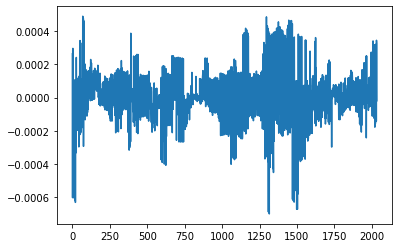

In [44]:
plt.plot(np.arange(length), y - design_mat @ beta)
plt.show()

In [45]:
df2 = pd.read_csv('data/2012_all_v2.csv')

df2 = df2.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})

l = []

for pop in POPs:

    l.append(set(df2[df2['pop_1'] == pop]['tel_1']))
# l

In [46]:
S_vector = lambda theta, phi: np.array([np.cos(theta)*np.sin(phi), np.cos(theta)*np.cos(phi), np.sin(theta)]).T

def create_design_matrix(df, telescopes, POPs):
    '''
    Description 
    '''

    length = len(df)
    width = 3*len(telescopes) + len(POPs)
    design_mat = np.zeros((length, width))

    theta = df['elevation']
    phi = df['azimuth']
    S = S_vector(theta, phi)
    
    for i, telescope in enumerate(telescopes):
    
        #i = 3*i

        design_mat[:,3*i:3+3*i] += S *  np.where(df['tel_1'] == telescope, 1, 0).reshape(-1,1)
        design_mat[:,3*i:3+3*i] += - S *  np.where(df['tel_2'] == telescope, 1, 0).reshape(-1,1)
    
    for j, POP in enumerate(POPs):

        design_mat[:,15+j] += np.where(df['pop_1'] == POP, 1, 0)
        design_mat[:,15+j] -= np.where(df['pop_2'] == POP, 1, 0)
        
    y = df['cart_2'].values - df['cart_1'].values
        
    return design_mat, y

In [47]:
S_vector = lambda theta, phi: np.array([np.cos(theta)*np.sin(phi), np.cos(theta)*np.cos(phi), np.sin(theta)]).T

def create_design_matrix(df, telescopes, POPs):
    '''
    Description 
    '''

    # ea. row must contain (x, y, z) for ea. telescope (except E1, the zero point) 
    # and all 30 POP settings for ea. telescope
    length = len(df)
    width = 3*(len(telescopes) - 1) + len(telescopes)*len(POPs) 
    design_mat = np.zeros((length, width))

    theta = df['elevation']
    phi = df['azimuth']
    S = S_vector(theta, phi)
    
    for i, telescope in enumerate(telescopes):
        
    
        # for ea. new telescope must jump 3 places for (x, y, z)
        i -= 1
        
        if telescope != 'E1': # keep 'E1' as the zero point

            design_mat[:,3*i:3+3*i] += S *  np.where(df['tel_1'] == telescope, 1, 0).reshape(-1,1)
            design_mat[:,3*i:3+3*i] -= S *  np.where(df['tel_2'] == telescope, 1, 0).reshape(-1,1)

        for j, POP in enumerate(POPs):
            
            # for ea. new POP
            #j *= 30
            
            # not working because E1 isn't in the list of telescopes 
            design_mat[:,15 + 30*i + j] += np.where((df['pop_1'] == POP) & (df['tel_1'] == telescope), 1, 0) # add when it is tel_1
            design_mat[:,15 + 30*i + j] -= np.where((df['pop_2'] == POP) & (df['tel_2'] == telescope), 1, 0) # subtract when it is the tel_2
        
    y = df['cart_2'].values - df['cart_1'].values
    
    pinv = np.linalg.pinv(design_mat)
        
    return design_mat, pinv, y

In [265]:
telescopes = ['E1', 'W2', 'W1', 'S2', 'S1', 'E2']
POPs = ['P1B1', 'P2B1', 'P3B1', 'P4B1', 'P5B1', 
        'P1B2', 'P2B2', 'P3B2', 'P4B2', 'P5B2', 
        'P1B3', 'P2B3', 'P3B3', 'P4B3', 'P5B3', 
        'P1B4', 'P2B4', 'P3B4', 'P4B4', 'P5B4', 
        'P1B5', 'P2B5', 'P3B5', 'P4B5', 'P5B5', 
        'P1B6', 'P2B6', 'P3B6', 'P4B6', 'P5B6']

df = pd.read_csv('data/2019_04_07.csv').sample(frac=0.1)
df = df.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})

# change to radians
df['azimuth'] = df['azimuth'] * 2 * np.pi / 360
df['elevation'] = df['elevation'] * 2 * np.pi / 360

design_mat, pinv, y = create_design_matrix(df, telescopes, POPs)

beta = pinv @ y

y - design_mat @ beta

array([-1.47338768e-04,  4.62868314e-05, -7.13247386e-05,  6.79279912e-05,
       -3.95740580e-05, -2.33139009e-04,  1.47307087e-04,  5.31630216e-05,
       -8.67615707e-05, -5.30496828e-05, -1.34860351e-04,  1.59919950e-04,
        6.37326380e-05,  7.70160741e-05,  6.50859912e-05,  4.10024055e-05,
        9.62206773e-05, -4.06947054e-05, -4.22381170e-05, -2.98613094e-05,
        8.61940809e-06,  3.02691205e-12, -5.48265384e-05,  4.02033177e-05,
        6.82344321e-07, -2.38105365e-05,  2.18381062e-04,  1.01420119e-05,
        1.54415716e-04,  1.19967597e-04,  2.14335678e-05, -4.00513340e-05,
       -3.18960984e-05, -2.75513000e-05, -3.87472794e-04,  5.90103951e-05,
        4.38041904e-05,  2.17197851e-04, -8.76882709e-08,  3.45641777e-05,
        1.60495816e-05, -5.16696457e-05, -8.42984988e-05, -2.93569105e-05,
        8.73269467e-05,  9.90778699e-05, -1.56331983e-04,  1.56227086e-04,
        2.87457649e-05,  4.43229539e-05,  1.02435192e-05, -5.83128589e-05,
        2.89919590e-05,  

In [278]:
n_solutions = 10

betas = np.empty((n_solutions,18))

for i, frac in enumerate(np.linspace(0.01,0.3,n_solutions)):
    
    df = pd.read_csv('data/2019_04_07.csv').sample(frac=frac)
    df = df.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})
    df['azimuth'] = df['azimuth'] * 2 * np.pi / 360
    df['elevation'] = df['elevation'] * 2 * np.pi / 360

    design_mat, pinv, y = create_design_matrix(df, telescopes, POPs)

    beta = pinv @ y
    
    betas[i] = np.concatenate((beta[:15], np.ones(3)))

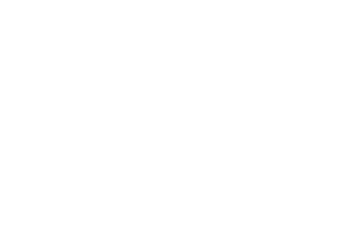

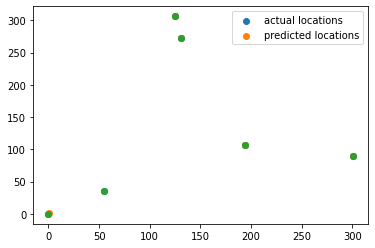

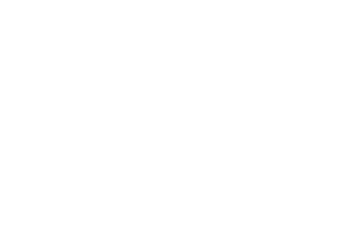

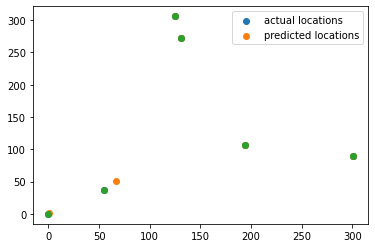

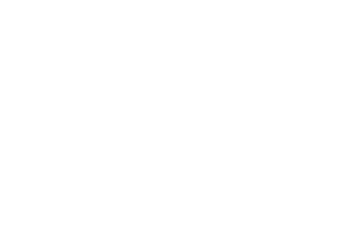

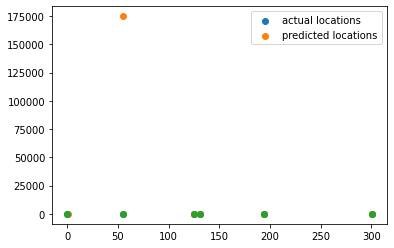

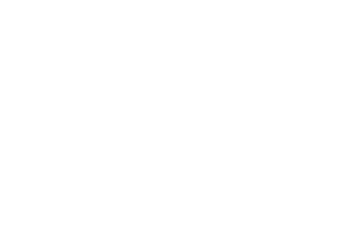

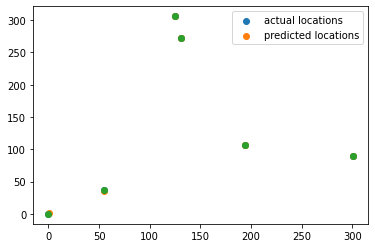

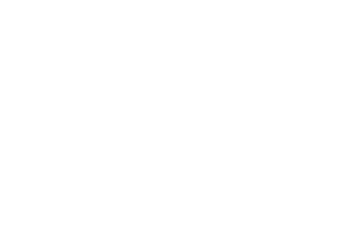

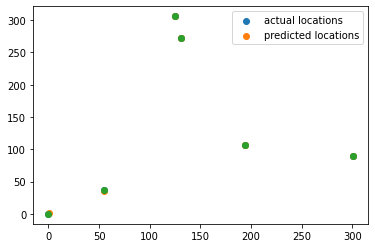

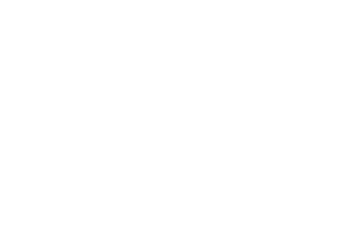

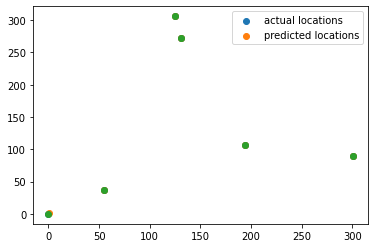

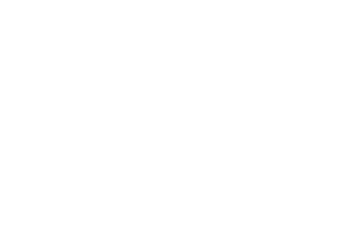

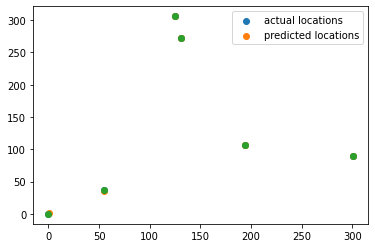

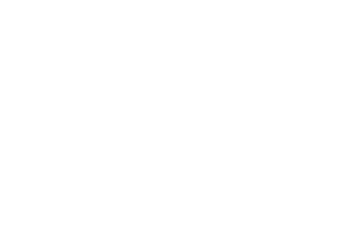

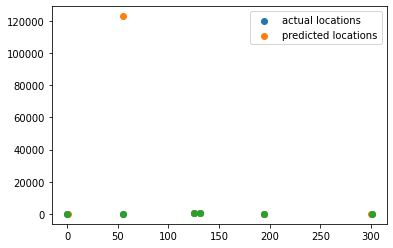

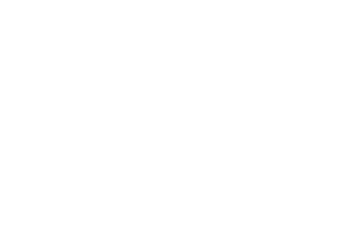

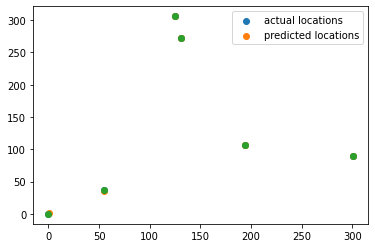

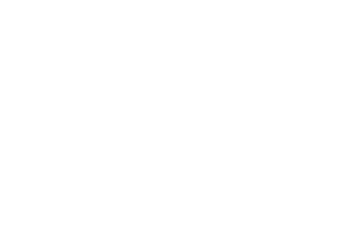

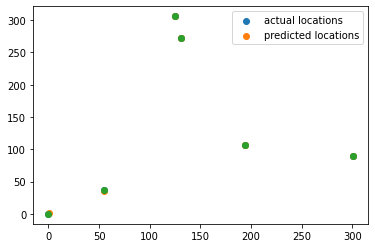

TypeError: 'PathCollection' object is not iterable

In [297]:
# add in ground truth points i.e. the vectors from E1 in the paper to millimetre precision
loc_actual = np.array([
    [0,0,0], # E1
    [194.451, 106.618, 6.318], # W2
    [300.442, 89.639, 4.954], # W1
    [131.120, 272.382, -6.508], # S2
    [125.371, 305.963, -5.865], # S1
    [54.970, 36.246, -3.077], # E2
])


# fig = plt.figure()
# ax = plt.axes(projection
# ax.scatter3D(telescope_locs[:,0], telescope_locs[:,1], telescope_locs[:,2]);='3d')
fig = plt.figure()

# Remove the axes for aesthetics
plt.axis('off')
ims = []

for i, beta in enumerate(betas): 
    plt.axis('off')
    fig = plt.figure()
    loc_predict = beta.reshape(-1,3)
    plt.scatter(loc_actual[:,0], loc_actual[:,1], label='actual locations')
    plt.scatter(loc_predict[:,0], loc_predict[:,1], label='predicted locations')
    plt.legend()
    ims.append((plt.scatter(loc_actual[:,0], loc_actual[:,1], label='actual locations')),)
    plt.show()
    
# Create the animation
im_ani = animation.ArtistAnimation(fig, ims, interval=700,
repeat_delay=1000, blit=True)

# Optional to save the animation
im_ani.save('test.gif', writer="imagemagick")

In [291]:
frames = np.stack(
    [iio.imread(f"{i}.jpg") for i in range(10)],
    axis=0
)

iio.imwrite('error_reduction.gif', frames, mode="I")

ValueError: Too many dimensions: 3 > 2.

### Notes 

- Strange as the errors for 04/07 and 11/06 seem to be find but the other two date seems to have unusually large errors... All of 2012 also has very large errors too
- Elevation and azimuth are swapped around for all the 2019 dates

## 2: SVD Error

- Analyse all nights for 2019 to see if there is any evidence for the telescopes moving due to seasonal effect 
- To do this need to estimate the uncertainty of the telescope position solution for EACH MONTH (?)

### Two ways to estimate errors
1. compare the solutions on two different nights in the same month and use the variation between the solutions to esitmate the solution uncertainty 
2. derive an uncertainty estimate using Singular Value Decomposition (SVD) of the design matrix to determine U, w and V.T matrixes using:

$$\sigma^2(\theta_j) = \sum_i \left ( \frac{V_{ji}}{w_i} \right )^2 \sigma^2_d$$

You can estimate 𝜎𝑑 from the residuals in your data, assuming that 𝜒2 of the best‑fit model approximately equal to the number of degrees of freedom.


In [51]:
# if we compare the solutions for the two different nights in April, we get:

df1 = pd.read_csv('data/2019_04_07.csv')
df2 = pd.read_csv('data/2019_04_08.csv')

df1 = df1.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})
df2 = df2.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})
df1['azimuth'] = df1['azimuth'] * 2 * np.pi / 360
df1['elevation'] = df1['elevation'] * 2 * np.pi / 360
df2['azimuth'] = df2['azimuth'] * 2 * np.pi / 360
df2['elevation'] = df2['elevation'] * 2 * np.pi / 360


design_mat1, pinv1, y1 = create_design_matrix(df1, telescopes, POPs)
design_mat2, pinv2, y2 = create_design_matrix(df2, telescopes, POPs)

(pinv1 @ y1 - pinv2 @ y2)[:15]

array([ 1.07474007e-03,  1.54198053e-04, -6.34205597e-03, -7.23506991e-04,
        9.46750322e-04, -7.39589303e-03,  7.76466448e-04,  5.94120408e-04,
       -5.10380483e-03,  9.04768143e-04,  3.68108611e-04,  2.96045213e-05,
        5.50812273e-03, -8.61702611e-03,  4.23875779e-03])

In [52]:
# if we compare the solutions for the two different nights in November, we get:

df1 = pd.read_csv('data/2019_11_05.csv')
df2 = pd.read_csv('data/2019_11_06.csv')

df1 = df1.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})
df2 = df2.rename(columns={'elevation': 'azimuth', 'azimuth': 'elevation'})
df1['azimuth'] = df1['azimuth'] * 2 * np.pi / 360
df1['elevation'] = df1['elevation'] * 2 * np.pi / 360
df2['azimuth'] = df2['azimuth'] * 2 * np.pi / 360
df2['elevation'] = df2['elevation'] * 2 * np.pi / 360


design_mat1, pinv1, y1 = create_design_matrix(df1, telescopes, POPs)
design_mat2, pinv2, y2 = create_design_matrix(df2, telescopes, POPs)

(pinv1 @ y1 - pinv2 @ y2)[:15]

array([ 1.14295556e-03,  7.37051381e-04, -2.23857786e-03,  1.08081444e-03,
        6.55980207e-04, -2.40966550e-03,  1.35871917e-03, -2.09947979e-04,
       -1.32894020e-03,  1.01737450e-03,  1.27827791e-03, -8.45434758e-04,
        2.93015586e-12, -9.62477730e-14,  5.92308106e-13])

2. derive an uncertainty estimate using Singular Value Decomposition (SVD) of the design matrix to determine U, w and V.T matrixes using:

$$\sigma^2(\theta_j) = \sum_i \left ( \frac{V_{ji}}{w_i} \right )^2 \sigma^2_d$$

Where $U, w, V$ come from the SVD. 

$\sigma_d$ is the RMS error on the delay measurements, assumed to be the same for all measurements in a given fit. It can be found from the residuals in the data using a $\chi^2$ distribution.

$$\chi^2 = \sum_i \frac{(\text{Expected}_i - \text{Observed}_i)^2}{\text{Expected}_i}$$

It is easy to see that the numerator is the residuals squared.

We assume that $\chi^2$ of the best-fit model is approximately equal to the number of degrees of freedom
 

In [53]:
residuals = y1 - design_mat1 @ (pinv1 @ y1)

chi_sq = np.sum(residuals**2/y1)

# chi-squared of the best-fit model 
sigma_d = np.sqrt(chi_sq)

In [54]:
U, w, Vt = np.linalg.svd(design_mat1)

In [55]:
# for very small values of w_i we just say that 1/w_i = 0
# small is N * eps times the maximum singular value, N is the number of data points and eps is the machine precision 
# we see that we are using numpy.float64
type(w[0])

numpy.float64

In [56]:
# we can find the epsilon of this via 
eps = np.finfo(float).eps
N = len(df1)

# w is given as a vector in ascending order
small = w[0] * N * eps
small

6.951375306652042e-11

In [57]:
# therefore the only singular values that we care about are... 

w_sig = w[w > small]

In [58]:
np.sum((Vt.T[:,:32]/w_sig)**2 * sigma_d**2, axis=1)[:15] # this seems odd... 

array([8.06924031e-08, 8.01698343e-08, 2.18159318e-07, 1.42792401e-07,
       8.49644912e-08, 2.23300763e-07, 8.18047554e-08, 1.86064576e-07,
       2.15297259e-07, 8.96883927e-08, 2.16630461e-07, 2.80211037e-07,
       4.51007794e-36, 4.04833148e-36, 1.29135861e-35])